# Implementation of K-Means Algorithm

In [1]:
#Importing Required Libraries.
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("income.csv")
dataset.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income')

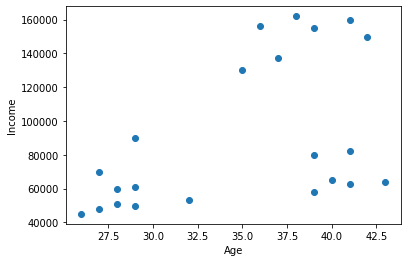

In [3]:
plt.scatter(dataset.Age,dataset.Income)
plt.xlabel('Age')
plt.ylabel('Income')

In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(dataset[['Age','Income']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

### Add another coloum cluster and store the y predicted value

In [5]:
dataset['cluster']=y_predicted
dataset.head()

,Name,Age,Income,cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [6]:
km.cluster_centers_ #find the centroid value

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

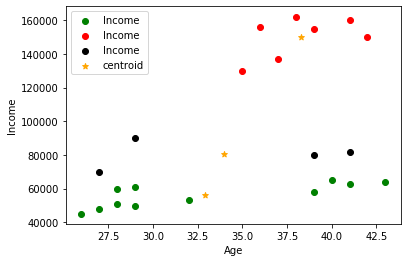

In [7]:
dataset1 = dataset[dataset.cluster==0]
dataset2 = dataset[dataset.cluster==1]
dataset3 = dataset[dataset.cluster==2]
plt.scatter(dataset1.Age,dataset1.Income,color='green',label='Income')
plt.scatter(dataset2.Age,dataset2.Income,color='red',label='Income')
plt.scatter(dataset3.Age,dataset3.Income,color='black',label='Income')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='orange',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

# Preprocessing using min max scaler
Transforms features by scaling each feature to a given range.
the range between 0 to 1.

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(dataset[['Income']])
dataset['Income'] = scaler.transform(dataset[['Income']])

scaler.fit(dataset[['Age']])
dataset['Age'] = scaler.transform(dataset[['Age']])

dataset.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


#### Again apply KMeans for changing dataset value and now find a good model of K-means 

In [9]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(dataset[['Age','Income']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [10]:
dataset['cluster']=y_predicted
dataset.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


### New centroid value

In [11]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

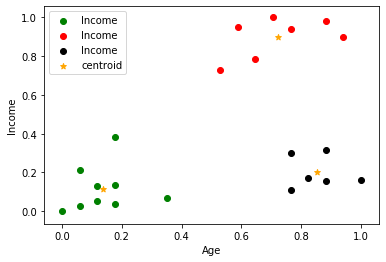

In [12]:
dataset1 = dataset[dataset.cluster==0]
dataset2 = dataset[dataset.cluster==1]
dataset3 = dataset[dataset.cluster==2]
plt.scatter(dataset1.Age,dataset1.Income,color='green',label='Income')
plt.scatter(dataset2.Age,dataset2.Income,color='red',label='Income')
plt.scatter(dataset3.Age,dataset3.Income,color='black',label='Income')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='orange',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()